<a href="https://colab.research.google.com/github/alonlavian/AlmaZohar/blob/master/AlmaZohar_naive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os 
from google.colab import drive
drive.mount('/content/drive/')


# Directory with our training Zohar pictures
train_Zohar_dir = os.path.join('/content/drive/My Drive/ML/AlmaZoharCrop/Training/Zohar')

# Directory with our training Alma pictures
train_Alma_dir = os.path.join('/content/drive/My Drive/ML/AlmaZoharCrop/Training/Alma')

# Directory with our validation Zohar pictures
val_Zohar_dir = os.path.join('/content/drive/My Drive/ML/AlmaZoharCrop/Validation/Zohar')

# Directory with our validation Alma pictures
val_Alma_dir = os.path.join('/content/drive/My Drive/ML/AlmaZoharCrop/Validation/Alma')



In [10]:
print('total training Alma images:', len(os.listdir(train_Alma_dir)))
print('total training Zohar images:', len(os.listdir(train_Zohar_dir)))

print('total validation Alma images:', len(os.listdir(val_Alma_dir)))
print('total validation Zohar images:', len(os.listdir(val_Zohar_dir)))


!diff -srq '/content/drive/My Drive/ML/AlmaZoharCrop/Training/Alma' '/content/drive/My Drive/ML/AlmaZoharCrop/Validation/Alma' | grep identical
!diff -srq '/content/drive/My Drive/ML/AlmaZoharCrop/Training/Zohar' '/content/drive/My Drive/ML/AlmaZoharCrop/Validation/Zohar' | grep identical

total training Alma images: 260
total training Zohar images: 192
total validation Alma images: 114
total validation Zohar images: 77


In [11]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.75),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('Alma') and 1 for the other ('Zohar')
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
model.summary()
    
    
 
    
    

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxP

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
    
  
 

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255,
#                                   preprocessing_function=preprocess_input,
                                  rotation_range=20,
#                                   horizontal_flip=True,
#                                   vertical_flip=True,
                                  shear_range=0.2,
                                  zoom_range=0.2) # zoom in or out in images)

validation_datagen = ImageDataGenerator(rescale=1/255,
#                                   preprocessing_function=preprocess_input,
                                  rotation_range=20,
#                                   horizontal_flip=True,
#                                   vertical_flip=True,
                                  shear_range=0.2,
                                  zoom_range=0.2) # zoom in or out in images)
        
        
# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/drive/My Drive/ML/AlmaZoharCrop/Training/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=100,
        class_mode='binary')


# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/drive/My Drive/ML/AlmaZoharCrop/Validation/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=10,
        class_mode='binary')

print( train_generator.class_indices)
print( validation_generator.class_indices)

Found 452 images belonging to 2 classes.
Found 191 images belonging to 2 classes.
{'Alma': 0, 'Zohar': 1}
{'Alma': 0, 'Zohar': 1}


In [0]:
history = model.fit_generator(
      train_generator,
      validation_data=validation_generator,
      steps_per_epoch=1,  
      epochs=100,
      verbose=1)

# Some graphs


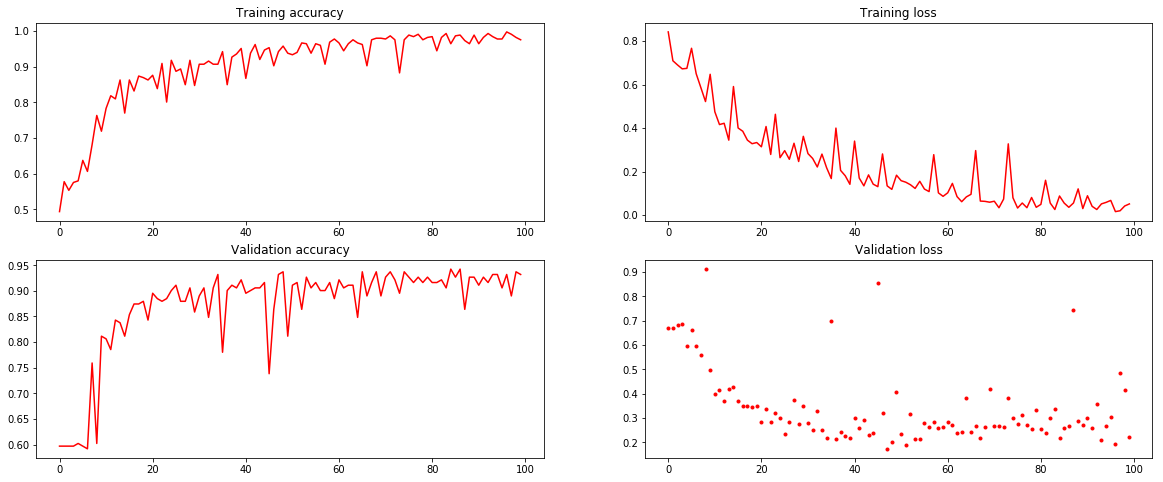

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np



def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth
  
  
# Plot the training and validation loss + accuracy
def plot_training(history):
    acc = history.history['acc']
    loss = history.history['loss']
      
    val_acc = history.history['val_acc']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    
    plt.figure(figsize=(20, 8))
#     plt.figure(figsize=20.)
    plt.grid(False)
    
    plt.subplot(2, 2, 1)
    plt.plot(epochs, acc, 'r')
    plt.title('Training accuracy')
    plt.subplot(2, 2, 2)
    plt.plot(epochs, loss, 'r')
    plt.title('Training loss')
    
    plt.subplot(2, 2, 3)
    plt.plot(epochs, val_acc, 'r')
    plt.title('Validation accuracy')
    
    plt.subplot(2, 2, 4)

    plt.plot(epochs,val_loss, 'r.')
    plt.title('Validation loss')
    
    
    plt.savefig('acc_vs_epochs.png')
    plt.show()
    
    
plot_training(history)

###Testing the model



In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a Zohar")
  else:
    print(fn + " is a Alma")
 

### Visualizing Intermediate Representations

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

16
32
32
64


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in true_divide


64
64
64
64
64


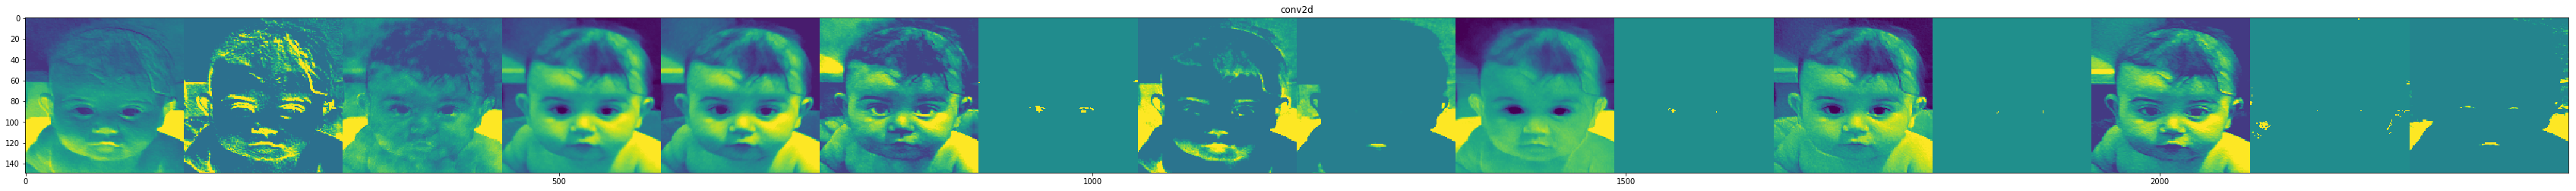

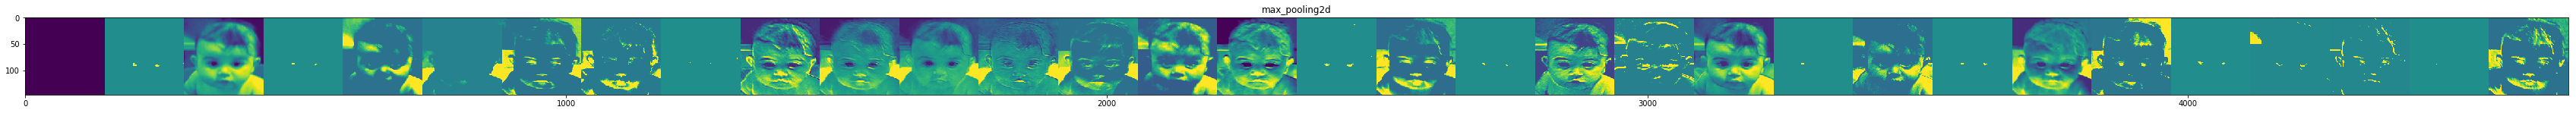

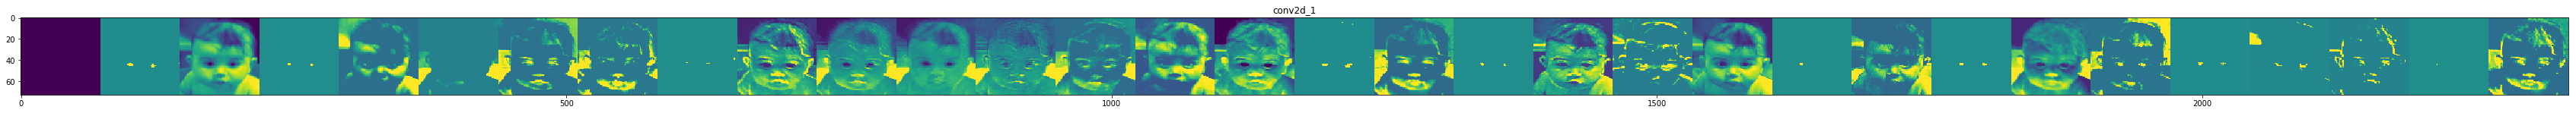

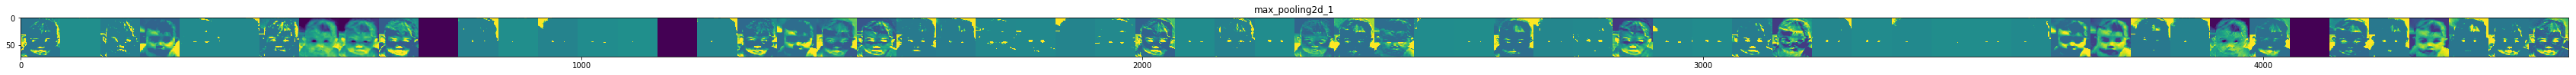

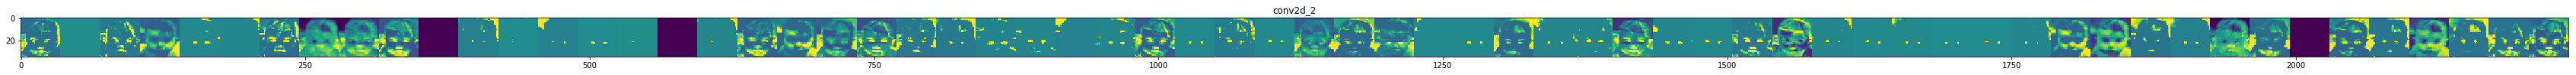

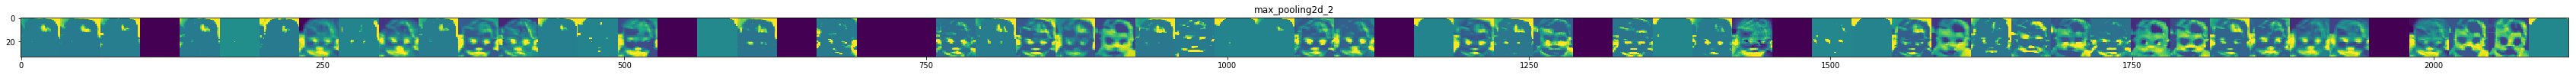

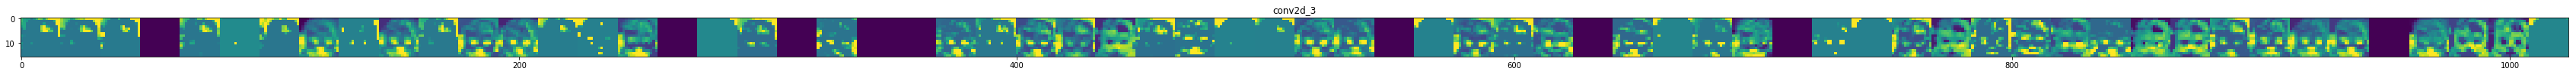

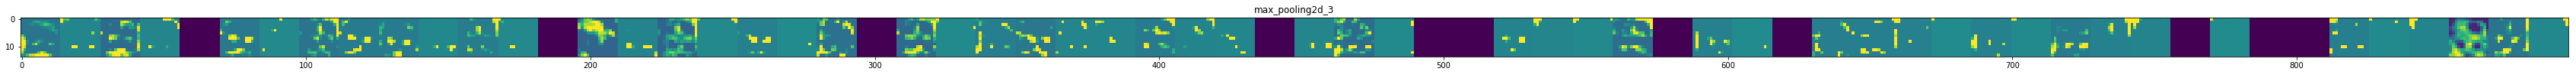

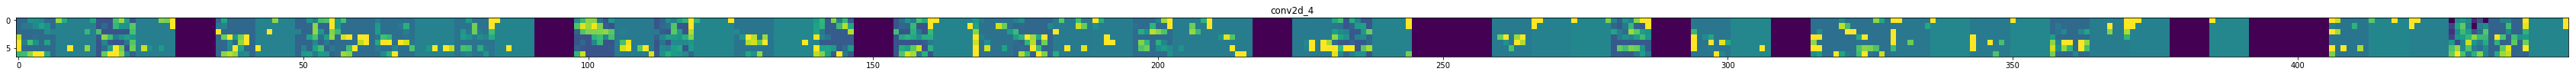

In [20]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

img = load_img('/content/drive/My Drive/ML/AlmaZoharCrop/Training/Alma/IMG_20140304_065413.jpg', target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    print (n_features)
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 60. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')